In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

    Constants

In [2]:
eps1 = 0.00001
eps2 = 0.0000001
m = (2,4,5,8)
f1 = lambda x: np.exp(np.cos(2*x))
a1 = 0
b1 = np.pi
x1 = np.linspace(a1,b1, 100)
y1 = list(map(f1,x1))

f2 = lambda x: np.log(1+x*x)/(2*x-1)
a2 = 1.2
b2 = 2.8
x2 = np.linspace(a2,b2, 100)
y2 = list(map(f2,x2))





    Graphics

In [3]:
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

In [4]:
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

In [5]:
ax1 = ax1.plot(x1,y1)
ax2 = ax2.plot(x2,y2)

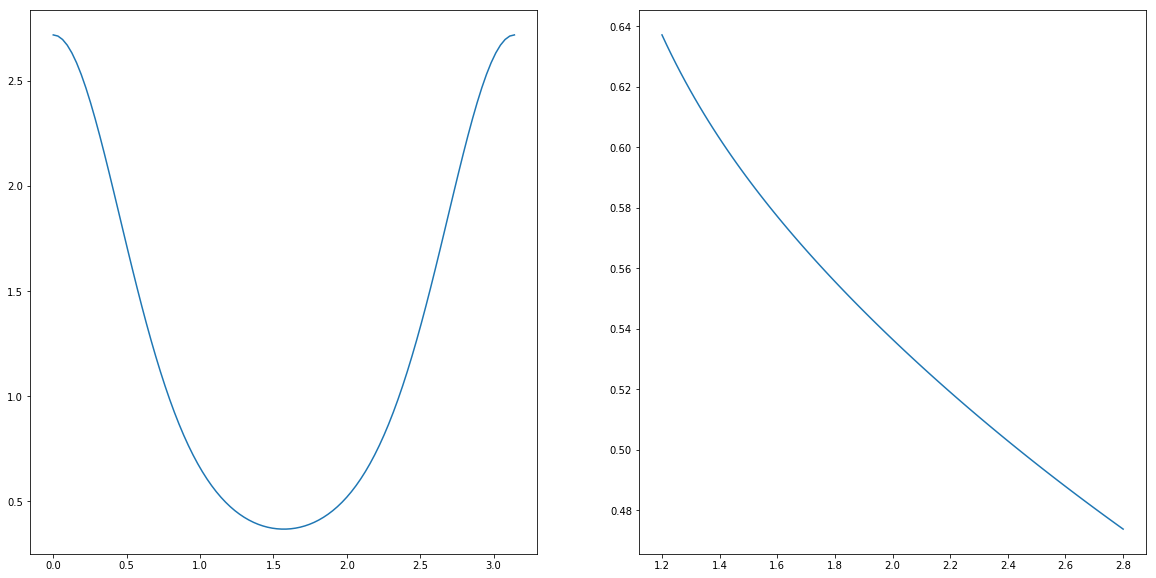

In [6]:
fig

КВАДРАТУРНЫЕ ФОРМУЛЫ ГАУССА

In [7]:
def GaussQuatro(foo,a,b,m):
    '''
    Вычисляет определенный интеграл по квадратурным формулам Гаусса для
    количества узлов {2,4,5,8}
    '''
    if not hasattr(GaussQuatro,'ms') and not hasattr(GaussQuatro,'xms') and not hasattr(GaussQuatro,'Ams'):
        GaussQuatro.ms = (2,4,5,8)
        GaussQuatro.xms = ((-1/(3)**0.5,1/(3)**0.5),
                          (-0.86114,-0.33998,0.33998,0.86114),
                          (-0.90618,-0.538469,0,0.538469,0.90618),
                          (-0.96028986,-0.79666648,-0.52553242,-0.18343464,0.18343464,0.52553242,0.79666648,0.96028986))
        GaussQuatro.Ams = ((1,1),
                          (0.34785,0.65215,0.65215,0.34785),
                          (0.23693,0.47863,0.56889,0.47863,0.23693),
                          (0.10122854,0.22238103,0.31370664,0.36268378,0.36268378,0.31370664,0.22238103,0.10122854))
    if m in GaussQuatro.ms:
        iter_m = GaussQuatro.ms.index(m)
        x = [(a+b)/2 + (b-a)/2*GaussQuatro.xms[iter_m][i] for i in range(m)]
        res = [GaussQuatro.Ams[iter_m][i]*foo(x[i]) for i in range(m)]
        return np.sum(res)*(b-a)/2
    return None

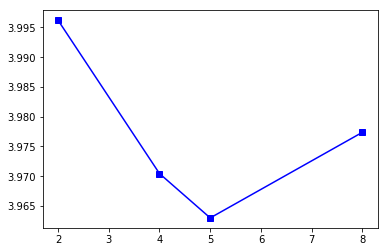

In [8]:
#f1 значение интеграла по формулам Гаусса с разным количеством отрезков разбиения
y = [GaussQuatro(f1,a1,b1,m) for m in (2,4,5,8)]
plt.plot((2,4,5,8),y,'bs-')

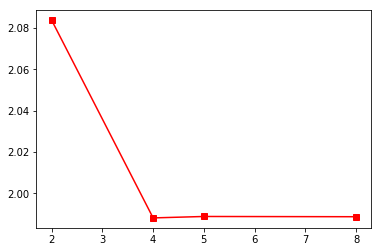

In [9]:
#f1.1 значение интеграла по формулам Гаусса с разным количеством отрезков разбиения
y = [GaussQuatro(f1,(a1+b1)/2,b1,m)for m in (2,4,5,8)]
plt.plot((2,4,5,8),y, 'rs-')

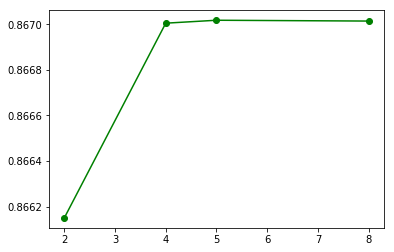

In [10]:
#f2 значение интеграла по формулам Гаусса с разным количеством отрезков разбиения
y = [GaussQuatro(f2,a2,b2,m) for m in (2,4,5,8)]
plt.plot((2,4,5,8),y,'go-')

РУНГЕ. ФОРМУЛА ТРАПЕЦИЙ. ФОРМУЛА СИМПСОНА.

In [11]:
def runge(method,f,a,b,eps, n = 2):
    '''
    правило рунге
    n - число разбиений
    method - формула трапеций\симпсона итд
    Возвращает: (количество разбиений отрезка,
                    шаг интегрирования,
                    точность,
                    вычисленное значение интеграла,
                    погрешность)
    '''
    Ih1 = method(f,a,b,n)
    n *=2
    Ih2 = method(f,a,b,n)
    while method.tetta*abs(Ih2 - Ih1) >= eps:
        n *=2
        Ih1 = Ih2
        Ih2 = method(f,a,b,n)
    return method.__name__,n, (b-a)/n, eps, Ih2, method.tetta*abs(Ih2 - Ih1)
    
    

In [12]:
def Trapeze(f,a,b,n):
    Trapeze.tetta = 1/3
    h = (b-a)/n
    res = f(a) + f(b)
    res += 2*np.sum(np.array([f(a + h*(i)) for i in range(1,n)])) 
    return h/2*res

In [13]:
def Simpson(f,a,b,n):
    Simpson.tetta = 1/15
    h = (b-a)/2/n
    res = (b-a)/6/n
    res1 = f(a) + f(b)
    res1 += 2*np.sum(np.array([f(a + h*(2*i-2)) for i in range(2,n+1)])) 
    res1 += 4*np.sum(np.array([f(a + h*(2*i-1)) for i in range(1,n+1)]))
    return res*res1

In [14]:
df = pd.DataFrame(data = [runge(Simpson, f2,a2,b2,eps2),
                    runge(Simpson, f2,a2,b2,eps1),
                    runge(Trapeze, f2,a2,b2,eps2),
                    runge(Trapeze, f2,a2,b2,eps1),
                    runge(Simpson, f1,a1,b1,eps2),
                    runge(Simpson, f1,a1,b1,eps1),
                    runge(Trapeze, f1,a1,b1,eps2),
                    runge(Trapeze, f1,a1,b1,eps1)], 
             columns = ['метод',
                        'количество разбиений отрезка',
                        'шаг интегрирования',
                        'точность',
                        'значение интеграла',
                        'погрешность'])

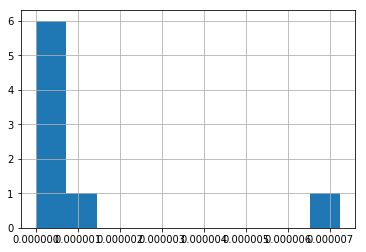

In [15]:
df['погрешность'].hist()

In [16]:
df

,метод,количество разбиений отрезка,шаг интегрирования,точность,значение интеграла,погрешность
0,Simpson,16,0.100000,1.000000e-07,0.867015,8.045010e-08
1,Simpson,8,0.200000,1.000000e-05,0.867016,1.120910e-06
2,Trapeze,1024,0.001562,1.000000e-07,0.867015,2.835239e-08
3,Trapeze,64,0.025000,1.000000e-05,0.867022,7.251618e-06
4,Simpson,16,0.196350,1.000000e-07,3.977463,1.390765e-08
5,Simpson,16,0.196350,1.000000e-05,3.977463,1.390765e-08
6,Trapeze,32,0.098175,1.000000e-07,3.977463,4.440892e-16
7,Trapeze,16,0.196350,1.000000e-05,3.977463,2.086148e-07


КУБАТУРНАЯ ФОРМУЛА СИМПСОНА

In [16]:
def Cubatura(f,a,b,c,d):
    r0 = f(a,(c+d)/2) + 4*f((a+b)/2,(c+d)/2) + f(b,(c+d)/2)
    r1 = f(a,c) + f((a+b)/2,c) + f(b,c) + 4*(r0) + f(a,d) + 4*f((a+b)/2,d) + f(b,d)
    r1 *= (d-c)*(b-a)/36
    return r1

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def plot3D(f,a,b,c,d):
    delta = 30
    x = np.arange(a, b, (b-a)/delta)
    y = np.arange(c, d, (d-c)/delta)
    xgrid, ygrid = np.meshgrid(x, y)

    zgrid = f(xgrid,ygrid)
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(20)
    axes = Axes3D(fig)
    axes.plot_surface(xgrid, ygrid, zgrid, rstride=1, cstride=1)
    

In [19]:
ff = lambda x,y: np.exp(-1/y**2)*np.exp(-1/x**2)

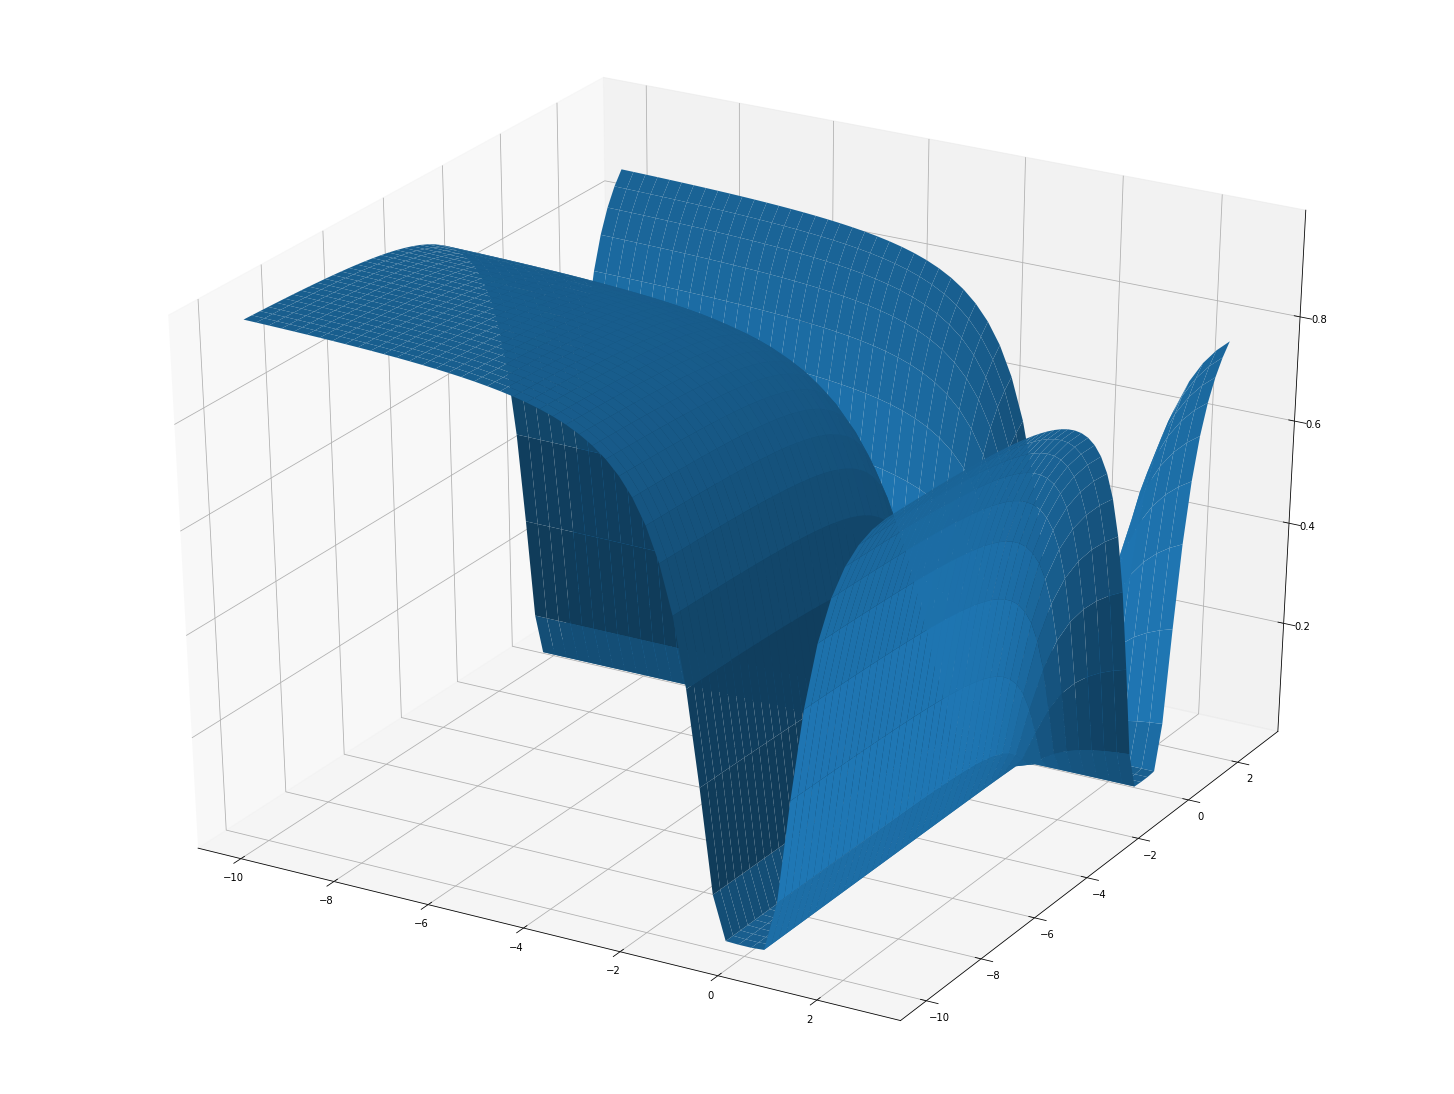

In [22]:
plot3D(ff,-10,3,-10,3)

In [33]:
Cubatura(ff,-15,15,-15,15)

506250.0